In [37]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
# Load data
with open("../results/densenet201_results.json", "r") as f:
    dn201_res_os = json.load(f)
with open("../results/densenet201_results_cv.json", "r") as f:
    dn201_res_os_cv = json.load(f)
with open("../results/densenet201_results_closed_set.json", "r") as f:
    dn201_res_cs = json.load(f)
with open("../results/resnet101_results.json", "r") as f:
    rn101_res_os = json.load(f)
with open("../results/resnet101_results_cv.json", "r") as f:
    rn101_res_os_cv = json.load(f)
with open("../results/resnet101_results_closed_set.json", "r") as f:
    rn101_res_cs = json.load(f)

Text(0.5, 1.0, 'CMC - open set cross validation')

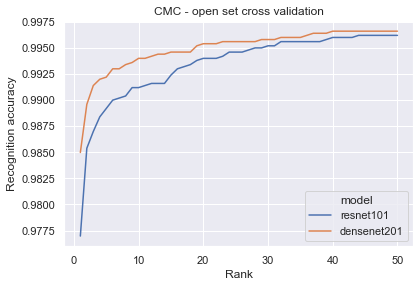

In [56]:
df_cv = pd.DataFrame()

df_cv["Accuracy"] = np.hstack([rn101_res_os_cv["rank_n_accuracies_mean"], dn201_res_os_cv["rank_n_accuracies_mean"]])
# df_cv["style"] = np.repeat(0,len(dn201_res_os_cv["rank_n_accuracies_mean"]))
df_cv["model"] = np.hstack([np.repeat("resnet101", len(rn101_res_os_cv["rank_n_accuracies_mean"])), np.repeat("densenet201", len(dn201_res_os_cv["rank_n_accuracies_mean"]))])
df_cv["rank"] = np.hstack([range(1,51) for i in range(2)])

sns.lineplot(data=df_cv,x="rank", y="Accuracy", hue="model")
plt.ylabel("Recognition accuracy")
plt.xlabel("Rank")
plt.tight_layout()
plt.title("CMC - open set cross validation")

Text(0.5, 1.0, 'CMC - open set cross validation')

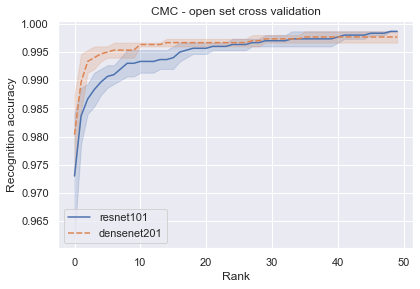

In [31]:


df_os = pd.DataFrame()
df_os["resnet101 - open set"] = rn101_res_os["rank_n_accuracies"]
df_os["densenet201 - open set"] = dn201_res_os["rank_n_accuracies"]

df_cs = pd.DataFrame()
df_cs["resnet101 - closed set"] = rn101_res_cs["rank_n_accuracies"]
df_cs["densenet201 - closed set"] = dn201_res_cs["rank_n_accuracies"]

df = pd.concat([df_os, df_cs])
sns.lineplot(data=df, hue=df.columns)
plt.ylabel("Recognition accuracy")
plt.xlabel("Rank")
plt.tight_layout()
plt.title("CMC - open set cross validation")